<a href="https://colab.research.google.com/github/aledelorbe/pt2Codigos/blob/main/SegundasActividades/Algoritmos_Aglomerativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cargar librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.cluster import KMeans

### Cargar los dataFrame

In [3]:
nuevaMortalidadLimpia = '/content/drive/MyDrive/Pt2/Primeras Actividades/0 Bases de Datos/Nueva Mortalidad Limpia/'

df2010 = pd.read_csv(nuevaMortalidadLimpia + '2010.csv')
df2011 = pd.read_csv(nuevaMortalidadLimpia + '2011.csv')
df2012 = pd.read_csv(nuevaMortalidadLimpia + '2012.csv')
df2013 = pd.read_csv(nuevaMortalidadLimpia + '2013.csv')
df2014 = pd.read_csv(nuevaMortalidadLimpia + '2014.csv')
df2015 = pd.read_csv(nuevaMortalidadLimpia + '2015.csv')
df2016 = pd.read_csv(nuevaMortalidadLimpia + '2016.csv')
df2017 = pd.read_csv(nuevaMortalidadLimpia + '2017.csv')
df2018 = pd.read_csv(nuevaMortalidadLimpia + '2018.csv')
df2019 = pd.read_csv(nuevaMortalidadLimpia + '2019.csv')

### Unir todos los fragmentos

In [4]:
dfDefinitivo = pd.concat([df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019], ignore_index=True)

### Almacenamiento de valores distintos en cada columna

In [5]:
# Definicion de la funcion que imprimira los valores distintos de determinada columna en orden alfabetico
def imprimirValoresDistintos(df20xx, nombreColumna):
  titulo = f"Columna {nombreColumna}".center(100, '-')
  valoresDistintos = list(df2010[nombreColumna].unique())
  valoresDistintos.sort()
  print(titulo)
  print(valoresDistintos)
  print(f'Cantidad de elementos: {len(valoresDistintos)}')

  return valoresDistintos

estados = imprimirValoresDistintos(dfDefinitivo, 'ent_resid_nm')
canceres = imprimirValoresDistintos(dfDefinitivo, 'Organ')
trabajos = imprimirValoresDistintos(dfDefinitivo, 'desc_ocupacion')

----------------------------------------Columna ent_resid_nm----------------------------------------
['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila de Zaragoza', 'Colima', 'Distrito Federal', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos', 'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']
Cantidad de elementos: 32
-------------------------------------------Columna Organ--------------------------------------------
['Bladder', 'Bone', 'Brain', 'Breast', 'Cervix Uteri', 'Colon and Rectum', 'Esophagus', 'Eyes', 'Female Genitals', 'Gallbladder', 'Heart', "Hodgkin's Lymphoma", 'Kidney', 'Larynx', 'Leukemia', 'Liver ', 'Lungs', 'Lymphoma', 'Male Genitales', 'Melanoma', 'Mesothelioma', 'Mylenoma', 'Nervous', 'Oral Cavity an

In [6]:
# Para este caso se hace distinto ya que se desea crear una jerarquia (de menor a mayor jerarquia)
nivelesEscolares = [
    'No especificada ',
    'No aplica a menores de 3 años',
    'Sin escolaridad',
    'Preescolar',
    'Primaria completa',
    'Secundaria incompleta',
    'Secundaria completa',
    'Bachillerato o preparatoria',
    'Profesional',
    'Posgrado',
]
titulo = f"Columna desc_escolaridad".center(100, '-')
print(titulo)
print(nivelesEscolares)
print(f'Cantidad de elementos: {len(nivelesEscolares)}')

--------------------------------------Columna desc_escolaridad--------------------------------------
['No especificada ', 'No aplica a menores de 3 años', 'Sin escolaridad', 'Preescolar', 'Primaria completa', 'Secundaria incompleta', 'Secundaria completa', 'Bachillerato o preparatoria', 'Profesional', 'Posgrado']
Cantidad de elementos: 10


### Aplicar transformaciones y armado de matrices de datos

In [7]:
dfDefinitivo = pd.concat([df2010,
                          df2011,
                          df2012,
                          df2013,
                          df2014,
                          df2015,
                          df2016,
                          df2017,
                          df2018,
                          df2019], ignore_index=True)

In [8]:
# Defincion de la funcion que asocia estados, tipos de canceres y cierto parametro: nivel escolar o categoria de empleo utilizando transformaciones
def asociador(lista, df20xx, columnaX, parametro, anio):

  dfEstadosDefinitivoCanceres20xx = pd.DataFrame() # Crear el df que almacenara todos los datos de estados-educaciones-canceres

  for indice, estado in enumerate(estados):
    #dfEstadosParametroCanceres20xx = dfEstadosCod.iloc[indice:indice+1, 1:] # Almacenar el estado X
    dfEstadosParametroCanceres20xx = pd.DataFrame({'vacio': [0]})

    condicion = (df20xx['ent_resid_nm'] == estado) # Total de personas en cierto estado
    total = df20xx.loc[condicion].shape[0]

    # Crear una nueva columna por cada valor distinto (nivel educativo ó categoria de ocupacion)
    # y colocarle la frecuencia del valor distinto respectivamente
    for etiqueta in lista:
      # Determinar cuantas personas hay por cada nivel educativo y por cada estado
      condicion = (df20xx[columnaX] == etiqueta) & (df20xx['ent_resid_nm'] == estado)
      cantidad = df20xx.loc[condicion].shape[0]

      # Si la frecuancia de esa etiqueta es 0 igualemente crea la columna con ese nombre y colocale 0
      if cantidad == 0:
        dfEstadosParametroCanceres20xx[etiqueta] = 0
      else:
        dfEstadosParametroCanceres20xx[etiqueta] = cantidad / total # Escalado de datos

    # Crear una nueva columna por cada valor distinto (tipo de cancer)
    # y colocarle la frecuencia del valor distinto respectivamente
    for cancer in canceres:
      # Determinar cuantas personas hay por cada nivel educativo y por cada estado
      condicion = (df20xx['Organ'] == cancer) & (df20xx['ent_resid_nm'] == estado)
      cantidad = df20xx.loc[condicion].shape[0]

      # Si la frecuancia de esa etiqueta es 0 igualemente crea la columna con ese nombre y colocale 0
      if cantidad == 0:
        dfEstadosParametroCanceres20xx[cancer] = 0
      else:
        dfEstadosParametroCanceres20xx[cancer] = cantidad / total # Escalado de datos

    dfEstadosParametroCanceres20xx = dfEstadosParametroCanceres20xx.drop(['vacio'], axis=1)
    dfEstadosDefinitivoCanceres20xx = pd.concat([dfEstadosDefinitivoCanceres20xx, dfEstadosParametroCanceres20xx], ignore_index=True)

  # Agregar el anio
  #dfEstadosDefinitivoCanceres20xx['anio'] = anio


  # Imprimir resultado
  titulo = f"Asociacion de datos por estado, por {parametro} y por tipo de cancer en el año: {anio}".center(140, '-')
  print(titulo)
  print(dfEstadosDefinitivoCanceres20xx.shape)
  print(dfEstadosDefinitivoCanceres20xx.to_string())

  return dfEstadosDefinitivoCanceres20xx

##### Estados - Educaciones - Canceres

In [9]:
# En especifico para este parametro se obtienen: 10 niveles escolares + 36 tipos de canceres = 46 cols
dfEstadosEducacionesCanceres = asociador(nivelesEscolares, dfDefinitivo, 'desc_escolaridad', 'Nivel academico', '(todos los años)')

--------------------Asociacion de datos por estado, por Nivel academico y por tipo de cancer en el año: (todos los años)--------------------
(32, 46)
    No especificada   No aplica a menores de 3 años  Sin escolaridad  Preescolar  Primaria completa  Secundaria incompleta  Secundaria completa  Bachillerato o preparatoria  Profesional  Posgrado   Bladder      Bone     Brain    Breast  Cervix Uteri  Colon and Rectum  Esophagus      Eyes  Female Genitals  Gallbladder     Heart  Hodgkin's Lymphoma    Kidney    Larynx  Leukemia    Liver      Lungs  Lymphoma  Male Genitales  Melanoma  Mesothelioma  Mylenoma   Nervous  Oral Cavity and Pharynx  Outter Respiratory     Ovary  Pancreas  Prostate  Skin non Melanoma   Soft Tissue   Stomach    Testis   Thyroid   Trachea    Ureter  Urinary Tract Other
0           0.032313                       0.005102         0.100340    0.240058           0.254055               0.021716             0.129906                     0.087781     0.118001  0.010727  0.016

##### Estados - Empleos - Canceres

In [10]:
# En especifico para este parametro se obtienen: 13 categorias de empleo + 36 tipos de canceres = 49 cols
dfEstadosEmpleosCanceres = asociador(trabajos, dfDefinitivo, 'desc_ocupacion', 'Categoria de empleo', '(Todos los años)')

------------------Asociacion de datos por estado, por Categoria de empleo y por tipo de cancer en el año: (Todos los años)------------------
(32, 49)
    Comerciantes, empleados en ventas y agentes de ventas  Funcionarios, directores y jefes  Insuficientemente especificada  No aplica a menores de 5 años  No especificada  No trabaja  Operadores de maquinaria industrial, ensambladores, choferes y conductores de transporte  Profesionistas y técnicos  Trabajadores artesanales  Trabajadores auxiliares en actividades administrativas  Trabajadores en actividades agrícolas, ganaderas, forestales, caza y pesca  Trabajadores en actividades elementales y de apoyo  Trabajadores en servicios personales y vigilancia   Bladder      Bone     Brain    Breast  Cervix Uteri  Colon and Rectum  Esophagus      Eyes  Female Genitals  Gallbladder     Heart  Hodgkin's Lymphoma    Kidney    Larynx  Leukemia    Liver      Lungs  Lymphoma  Male Genitales  Melanoma  Mesothelioma  Mylenoma   Nervous  Oral Cavity an

In [25]:
dfEstadosEmpleosCanceres2010 = asociador(trabajos, df2010, 'desc_ocupacion', 'Categoria de empleo', '(Todos los años)')

------------------Asociacion de datos por estado, por Categoria de empleo y por tipo de cancer en el año: (Todos los años)------------------
(32, 49)
    Comerciantes, empleados en ventas y agentes de ventas  Funcionarios, directores y jefes  Insuficientemente especificada  No aplica a menores de 5 años  No especificada  No trabaja  Operadores de maquinaria industrial, ensambladores, choferes y conductores de transporte  Profesionistas y técnicos  Trabajadores artesanales  Trabajadores auxiliares en actividades administrativas  Trabajadores en actividades agrícolas, ganaderas, forestales, caza y pesca  Trabajadores en actividades elementales y de apoyo  Trabajadores en servicios personales y vigilancia   Bladder      Bone     Brain    Breast  Cervix Uteri  Colon and Rectum  Esophagus      Eyes  Female Genitals  Gallbladder     Heart  Hodgkin's Lymphoma    Kidney    Larynx  Leukemia    Liver      Lungs  Lymphoma  Male Genitales  Melanoma  Mesothelioma  Mylenoma   Nervous  Oral Cavity an

### Creacion de Modelos

In [11]:
# Agregar librerias para utilizar el algoritmo e implementar metricas
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

#### Dendrograma

##### Educaciones

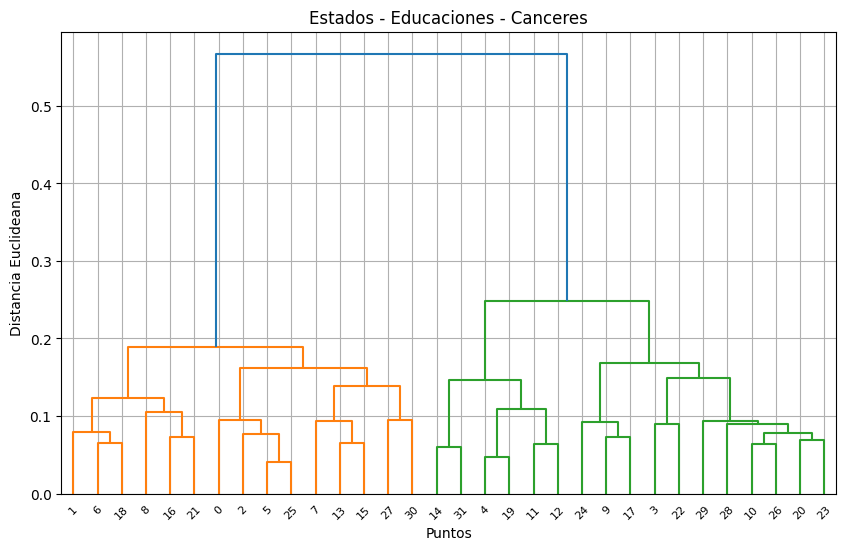

In [26]:
plt.figure(figsize=(10, 6))
#sch.dendrogram(sch.linkage(dfEstadosEducacionesCanceres, method="ward"))
sch.dendrogram(sch.linkage(dfEstadosEmpleosCanceres2010, method="ward"))
#plt.yticks([i*0.02 for i in range(0, int(0.6/0.02)+1)], [round(i*0.02, 2) for i in range(0, int(0.6/0.02)+1)])
plt.title('Estados - Educaciones - Canceres')
plt.xlabel('Puntos')
plt.ylabel('Distancia Euclideana')
plt.grid()

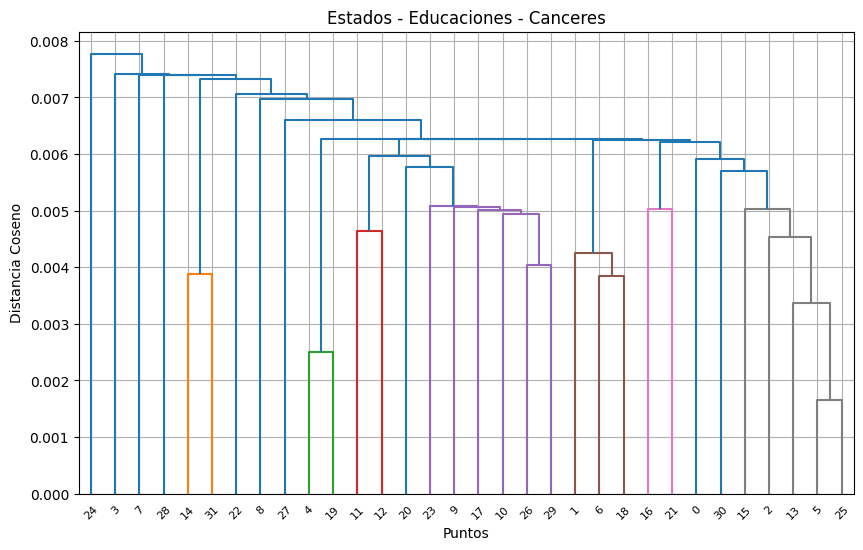

In [28]:
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(dfEstadosEmpleosCanceres2010, metric='cosine'))
#sch.dendrogram(sch.linkage(dfEstadosEducacionesCanceres, metric='cosine'))
#plt.axhline(y=0.015, color='r', linestyle='--')
#plt.yticks([i*0.002 for i in range(0, int(0.028/0.002)+1)], [round(i*0.002, 4) for i in range(0, int(0.028/0.002)+1)])
plt.title('Estados - Educaciones - Canceres')
plt.xlabel('Puntos')
plt.ylabel('Distancia Coseno')
plt.grid()

##### Empleos

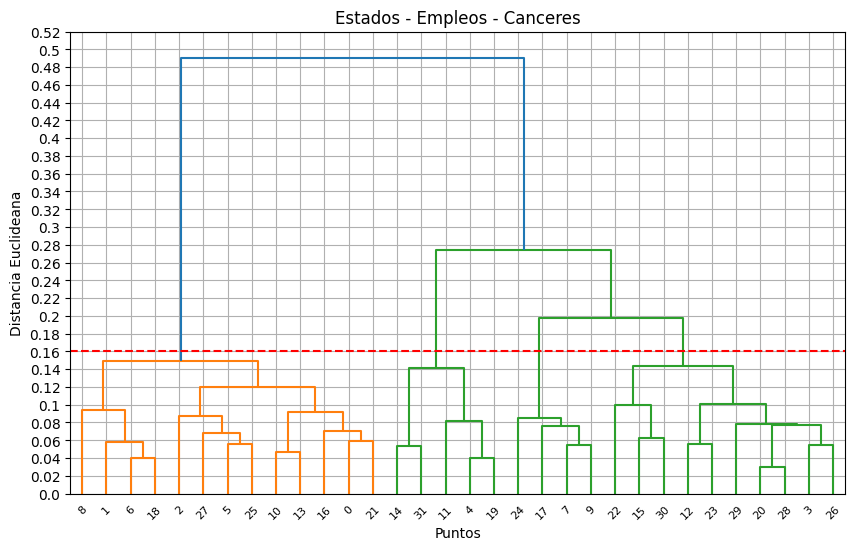

In [21]:
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(dfEstadosEmpleosCanceres, method="ward"))
plt.axhline(y=0.16, color='r', linestyle='--')
plt.yticks([i*0.02 for i in range(0, int(0.52/0.02)+1)], [round(i*0.02, 2) for i in range(0, int(0.52/0.02)+1)])
plt.title('Estados - Empleos - Canceres')
plt.xlabel('Puntos')
plt.ylabel('Distancia Euclideana')
plt.grid()

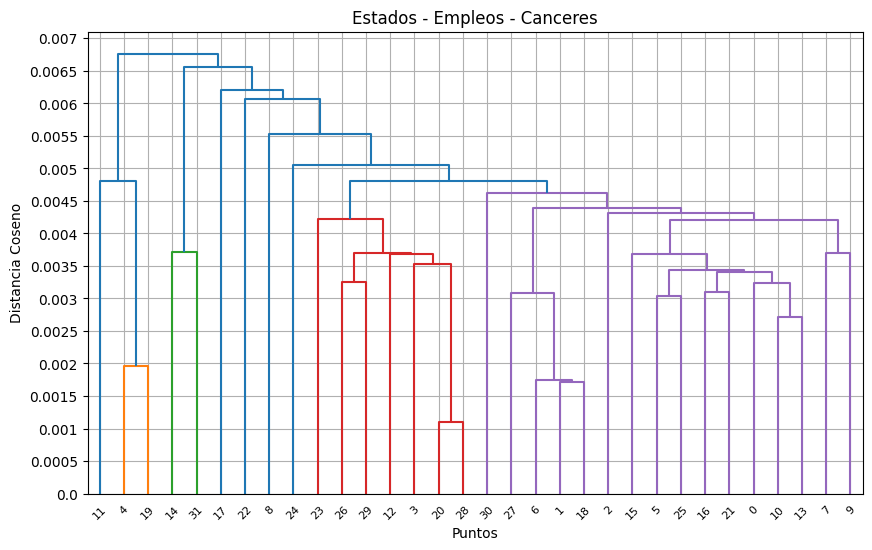

In [24]:
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(dfEstadosEmpleosCanceres, metric='cosine'))
plt.axhline(y=0.015, color='r', linestyle='--')
plt.yticks([i*0.0005 for i in range(0, int(0.007/0.0005)+1)], [round(i*0.0005, 4) for i in range(0, int(0.007/0.0005)+1)])
plt.title('Estados - Empleos - Canceres')
plt.xlabel('Puntos')
plt.ylabel('Distancia Coseno')
plt.grid()

#### Creacion y evaluacion de modelos

In [ ]:
# Definicion del metodo que creara cierto modelo con el numero de cluster optimo y a su vez
# determinara el coeficiente de shilloutte obtenido con ese modelo.
def crearEvaluarModelo(df, numerClusters, nombreModelo):
  # Creacion del modelo con cierta cantidad de clusters
  algoritmoKmeans = KMeans(n_clusters=numerClusters, n_init=10, init='k-means++', max_iter=100, random_state=0)
  algoritmoKmeans.fit(df)
  grupos = algoritmoKmeans.fit_predict(df)
  pesos_pertenencia = algoritmoKmeans.transform(df)

  # Obtener el coeficiente de shilloutte
  coef = metrics.silhouette_score(df, grupos)

  # Imprimir los resultados
  print('Pesos de pertenencia')
  filas, columnas = pesos_pertenencia.shape
  for i in range(filas):
      for j in range(columnas):
          print(f'{pesos_pertenencia[i, j]:.3f}', end=' ')
      print('')
  print('Grupos')
  print(grupos)
  print(f'El coeficiente de shilloute para el modelo de {nombreModelo} es: {coef}')
  serie = pd.Series(grupos)
  df = pd.DataFrame({nombreModelo: serie})
  return df

In [ ]:
# Aplicar el metodo que creara el modelo a la matriz de datos de estados con educaciones con cierta
# cantidad de clusters.
gruposEducaciones = crearEvaluarModelo(dfDefinitivoEducacion, 5, 'Educacion')

In [ ]:
# Aplicar el metodo que creara el modelo a la matriz de datos de estados con empleos con cierta
# cantidad de clusters.
gruposEmpleos = crearEvaluarModelo(dfDefinitivoEmpleo, 5, 'Empleo')

### Guardar Resultados

In [ ]:
"""
modelosResultados2 = '/content/drive/MyDrive/Pt2/Primeras Actividades/0 Bases de Datos/Modelos Resultados 2/'

dfDefinitivoEducacion.to_csv(modelosResultados2 + 'dfEducaciones.csv', index=False)
dfDefinitivoEmpleo.to_csv(modelosResultados2 + 'dfEmpleos.csv', index=False)
gruposEducaciones.to_csv(modelosResultados2 + 'gruposEducaciones.csv', index=False)
gruposEmpleos.to_csv(modelosResultados2 + 'gruposEmpleos.csv', index=False)
"""
# se tendrian que guardar los que no estan escalados